In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy
import matplotlib
# import spectrogram_sw as spec 

np.seterr(divide='ignore', invalid='ignore')

# 预设字体格式，并传给rc方法
font = {'family': 'SimHei', "size": 10}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.unicode_minus'] = False

np.set_printoptions(precision=2)

In [2]:
para_file = "./ResFiles/Wav/Word_voice_tmptWordPara.npz"

pars_pc = np.load(para_file)
print(pars_pc.files)
print(pars_pc["arr_0"].shape)

['arr_0']
(24,)


(80, 80)


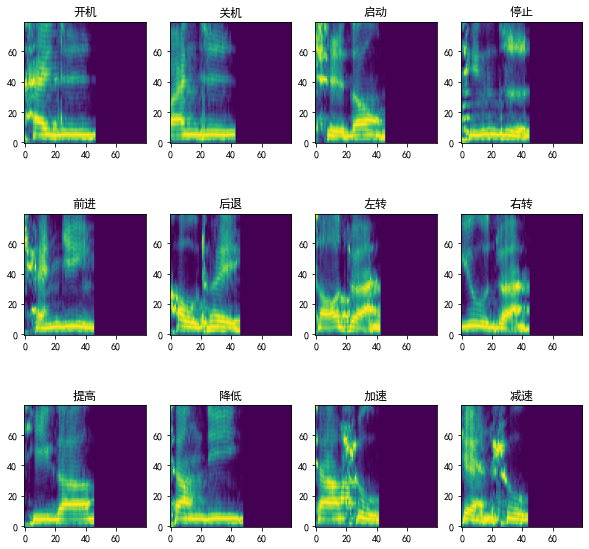

In [3]:
print(pars_pc['arr_0'][1]['specgram'].shape)
plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        plt.subplot(3,4,i*4 + j+1)
        plt.imshow(pars_pc['arr_0'][i*4 + j]['specgram'], 
                  origin='lower')
        plt.title(pars_pc['arr_0'][i*4 + j]['word'])
plt.show()

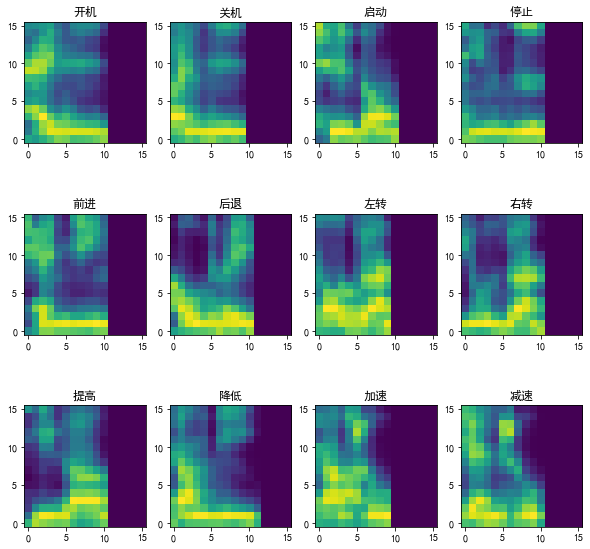

In [4]:
plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        plt.subplot(3,4,i*4 + j+1)
        plt.imshow(pars_pc['arr_0'][i*4 + j]['spec_zoom_out'], 
                  origin='lower')
        plt.title(pars_pc['arr_0'][i*4 + j]['word'])
plt.show()

In [5]:
para_file = "./ResFiles/Wav/mic_开机关机启动停止前进后退左转右转提高降低加速减速WordPara.npz"

pars_mic = np.load(para_file)
print(pars_mic.files)
print(pars_mic["arr_0"].shape)

['arr_0']
(24,)


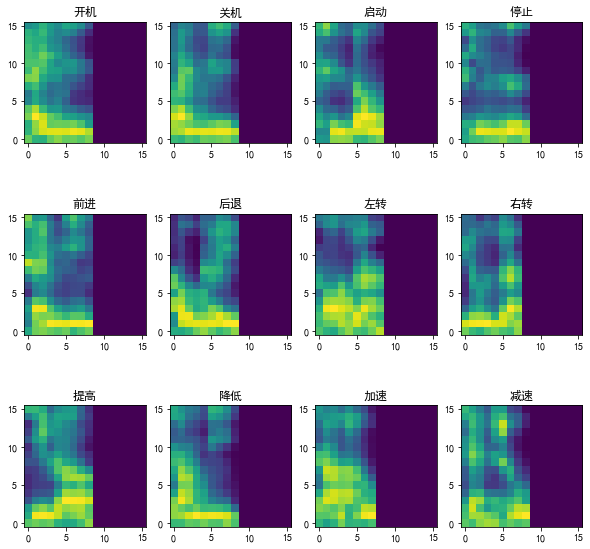

In [6]:
plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(4):
        plt.subplot(3,4,i*4 + j+1)
        plt.imshow(pars_mic['arr_0'][i*4 + j]['spec_zoom_out'], 
                  origin='lower')
        plt.title(pars_mic['arr_0'][i*4 + j]['word'])
plt.show()

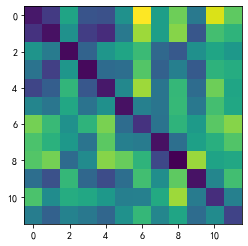

[[0.28 0.36 0.66 0.42 0.41 0.6  0.96 0.64 0.8  0.53 0.92 0.78]
 [0.34 0.26 0.6  0.37 0.32 0.53 0.86 0.64 0.83 0.43 0.74 0.71]
 [0.61 0.54 0.25 0.46 0.62 0.66 0.73 0.48 0.44 0.6  0.66 0.62]
 [0.51 0.37 0.62 0.25 0.49 0.5  0.77 0.46 0.55 0.44 0.7  0.69]
 [0.38 0.45 0.71 0.43 0.28 0.57 0.86 0.52 0.72 0.49 0.8  0.66]
 [0.56 0.52 0.67 0.51 0.6  0.26 0.55 0.52 0.72 0.52 0.74 0.67]
 [0.81 0.73 0.6  0.71 0.81 0.49 0.34 0.51 0.71 0.63 0.78 0.83]
 [0.75 0.7  0.62 0.51 0.78 0.55 0.54 0.27 0.5  0.65 0.69 0.76]
 [0.77 0.81 0.49 0.58 0.83 0.79 0.71 0.39 0.23 0.85 0.66 0.67]
 [0.5  0.41 0.72 0.48 0.4  0.5  0.74 0.59 0.78 0.27 0.57 0.74]
 [0.75 0.59 0.69 0.67 0.62 0.55 0.55 0.68 0.86 0.54 0.33 0.55]
 [0.54 0.46 0.56 0.52 0.47 0.6  0.72 0.57 0.66 0.49 0.58 0.38]]


In [7]:
def sub_abs_dhash(arr1, arr2):
    arr = arr1 - arr2
    _v, _w = arr.shape
    if _v * _w > 0:
        _sum = np.sum(abs(arr))/(_v*_w)
        return _sum
    else:
        return 1.0

def cal_dhash_diff_rate(arr1, arr2, phoneme=2):
    _v1, _w1 = arr1.shape
    _v2, _w2 = arr2.shape
    if _v1 != _v2:
        print('vertical of cal_dhash_diff_rate(arr1, arr2) must be same')
        return []
    if _w1 == _w2:
        _phoneme_width = _w1//2
        _out1 = sub_abs_dhash(arr1[0:_phoneme_width], 
                                   arr2[0:_phoneme_width])
        _out2 = sub_abs_dhash(arr1[_phoneme_width:], 
                                   arr2[_phoneme_width:])
        return max(_out1, _out2)   # 不同度 
#         return (_out1+_out2)/2
    if _w1 > _w2:
        _d = _w1 - _w2
        t_val = np.zeros(_d+1)
        for k in range(_d+1):
            t_val[k] = cal_dhash_diff_rate(arr1[:, k:k+_w2], arr2[:, 0:_w2])
        return np.min(t_val)
    else:
        _d = _w2 - _w1
        t_val = np.zeros(_d+1)
        for k in range(_d+1):
            t_val[k] = cal_dhash_diff_rate(arr1[:, 0:_w1], arr2[:, k:k+_w1])
        return np.min(t_val)
                                   
simi_arr = np.zeros((12,12))
for i in range(12):
    for j in range(12):
        _wi = pars_pc['arr_0'][i]['_zoom_width']
        _wj = pars_mic['arr_0'][j]['_zoom_width']
        simi_arr[i,j] = cal_dhash_diff_rate(pars_pc['arr_0'][i]['spec_dhash'][:,0:_wi],
                                           pars_mic['arr_0'][j]['spec_dhash'][:,0:_wj])
                
plt.imshow(simi_arr)
plt.show()

print(simi_arr)